## Module 3A: Assignment

### Weightage: 30 Marks

### Assessment task: 

You work for an AI image company and one of the departments focuses on research into the accurate and timely diagnosis of heart disease, fertility and breast cancer among residents living in Compassvale City. Their research also looks into the risk factors prevalent in this community as whole. Through a state-funded programme, they collect a huge among of anonymous and de-identified data on its residents. However, they face the challenge of making sense of this data. As an upcoming expert in Machine Learning, your assignment is to help the department to make sense of the data and deliver the following solutions.

#### Parts

1. Programming Part 1: Read the file containing the big heart dataset and display the output of these files

2. Programming Part 2: Write a programme that specifies the line of best fit for the fertility rate for workers.

3. Programming Part 3: Write a programme that can classify based on radius SE and texture SE of a breast mass and determine whether the diagnosis is mailgnant or benign.

4. Programming Part 4: Write a programme that potentially improves the linear regression using regularisation.

5. Programming Part 5: Write a programme that can classify two different types of data points with very high accuracy.

### Instructions:

1. Complete all three parts of the assignments by write the Python codes.
2. Run your codes to ensure that the required outputs are delivered.
3. Submit the assignment for grading and to get feedback.



### Programming Part 1: Read the file containing the big heart dataset and display the output of these files



### Assessment task:

Write a programme that reads the file containing the big heart dataset and display the output of these files. There are 6 steps involved, you will complete the code for step 2 and 4 only.

### Marks:
This part is of 6 Marks. 

### Instructions:

1. Write your Python code in place of "your code here" placeholder below.
2. Run your code by clicking on 'run' cell in the toolbar before you submit.
3. You will get the feedback once you submit the assignment.

### Submission:

Click on the submit button on the top right after you run the code.

#### Step 1
Import the libraries.

In [ ]:
from random import seed
from random import randrange
from csv import reader

from tabulate import tabulate

#### Step 2

Load the big heart CSV file

In [ ]:
def load_csv(filename, skip = False):
###
### YOUR CODE HERE
###

    dataset = list()
    
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        
        if skip:
            next(csv_reader, None)
        
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
            
    return dataset



#### Step 3

Print the file's content

_Note: This function can be called for other parts in the assignment_

In [ ]:
def print_the_dataset(dataset, contents = True, length = True):
    if(contents):
        print(tabulate(dataset))
        
    if(length):
        print(len(dataset))


#### Step 4

Split the big heart dataset into training and test data

In [ ]:
def train_test_split(dataset, split):


    # Create an empty list for the training set
    training = list()
    
    # Define the size of the training set
    train_size = split * len(dataset)
    
    # Copy the original dataset to 
    test = list(dataset)
    
    #Loops only to the size of the training set
    while len(training) < train_size:
        index = randrange(len(test))
        
        # Populate the training set, by moving the data points from the
        # dataset/test set to the training set
        training.append(test.pop(index))
        
    # Return both the training set and test set 
    return training, test


#### Step 5

Seed the random value

In [ ]:
seed(1)

#### Step 6

Load and prepare data

In [ ]:
filename = 'big_heart.csv'

dataset = load_csv(filename, skip = True)
print_the_dataset(dataset)
training, test = train_test_split(dataset, 0.8)

In [ ]:
print(len(training))

In [ ]:
print(len(test))

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Programming Part 2: Linear Regression

Write a programme that specifies the line of best fit for the fertility rate for workers.


### Assessment task:

Write code to analyse the relationships between the variables in a dataset between the percentage of female workers and the fertility rate of women. There are 13 steps involved, you will complete the code for steps 2, 3, 4, 5, 6, 7 and 9 only.

### Marks:

This part is of 6 Marks. 

### Instructions:

1. Write your Python code in place of "your code here" placeholder below.
2. Run your code by clicking on 'run' cell in the toolbar before you submit.
3. You will get the feedback once you submit the assignment.

### Submission:

Click on the submit button on the top right after you run the code.

#### Step 1

Import the needed libraries.

In [ ]:
from math import sqrt
from matplotlib import pyplot as plot
from random import seed
from random import randrange
from csv import reader

#### Step 2

Load a CSV file

In [ ]:
def load_csv(filename, skip = False):

    dataset = list()
    
    # Opens the file in read only mode
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        
        # Skip the header, if needed
        if skip:
            next(csv_reader, None)
        
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    
    return dataset


#### Step 3

Convert string column to float

In [ ]:
def string_column_to_float(dataset, column):
 
    for row in dataset:
        # The strip() function remove white space
        # then convert the data into a decimal number (float)
        # and overwrite the original data
        
        row[column] = float(row[column].strip())


#### Step 4

Calculate the mean value of a list of numbers

In [ ]:
def mean(values):
 
    # Sum all the values and then divide number of values
    return sum(values) / float(len(values))


#### Step 5

Calculate least squares between x and y

In [ ]:
def leastSquares(dataset):
    # Initialize lists to store x and y values
    x_values = []
    y_values = []
    
    # Populate x_values and y_values from the dataset
    for row in dataset:
        x_values.append(row[0])
        y_values.append(row[1])

    # Calculate the mean of x and y
    x_mean = mean(x_values)
    y_mean = mean(y_values)

    # Initialize variables to hold the numerators and denominators for b1
    numerator = 0.0
    denominator = 0.0

    # Calculate the values for the numerator and denominator
    for i in range(len(x_values)):
        numerator += (x_values[i] - x_mean) * (y_values[i] - y_mean)
        denominator += (x_values[i] - x_mean)**2

    # Calculate b1
    b1 = numerator / denominator

    # Calculate b0
    b0 = y_mean - b1 * x_mean

    return [b0, b1]


#### Step 6

Calculate root mean squared error

In [ ]:
def root_mean_square_error(actual, predicted): 
    
    sum_error = sum((predicted[i] - actual[i])**2 for i in range(len(actual)))
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)


#### Step 7

Make Predictions

In [ ]:
def simple_linear_regression(train, test):

    predictions = list()
    b0, b1 = leastSquares(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions


#### Step 8

Split the data into training and test sets

In [ ]:
def train_test_split(dataset, split):
    train = list()
    train_size = split * len(dataset)
    test = list(dataset)
    
    while len(train) < train_size:
        index = randrange(len(test))
        train.append(test.pop(index))
        
    return train, test

#### Step 9

Evaluate regression algorithm on training dataset

In [ ]:
def evaluate_simple_linear_regression(dataset, split=0):

    train, test = train_test_split(dataset, split)
    test_set = [row[:-1] for row in test]
    predicted = simple_linear_regression(train, test_set)
    actual = [row[-1] for row in test]
    rmse = root_mean_square_error(actual, predicted)
    return rmse


#### Step 10

Visualise the dataset

In [ ]:
def visualise_dataset(dataset):
    test_set = list()
    
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    
    sizes, prices = [], []
    for i in range(len(dataset)):
        sizes.append(dataset[i][0])
        prices.append(dataset[i][1])
        
    plot.figure()
    plot.plot(sizes, prices, 'x')
    plot.plot(test_set, simple_linear_regression(dataset, test_set))
    plot.xlabel('Size')
    plot.ylabel('Price')
    plot.grid()
    plot.tight_layout()
    plot.show()

#### Step 11

Seed the random value

In [ ]:
seed(1)

#### Step 12

Load and prepare data

In [ ]:
filename = 'fertility_rate-worker_percent.csv'
dataset = load_csv(filename, skip=True)

for i in range(len(dataset[0])):
    string_column_to_float(dataset, i)

#### Step 13

Evaluate algorithm

In [ ]:
split = 0.6
rmse = evaluate_simple_linear_regression(dataset, split)

print('Root Mean Square Error: %.3f' % rmse)
visualise_dataset(dataset)

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Programming Part 3: Logistic Regression

Write a programme that can classify a digitized image of a fine needle aspirate (FNA) of a breast mass and determine whether the diagnosis is mailgnant or benign.


### Assessment task:

Write code to produce classification graphs and determine the accurary. There are 14 steps involved, you will complete the code for steps 3, 4, 5, 6, 7, 8, 10, 11 and 12 only.

### Marks:

This part is of 6 Marks. 

### Instructions:

1. Write your Python code in place of "your code here" placeholder below.
2. Run your code by clicking on 'run' cell in the toolbar before you submit.
3. You will get the feedback once you submit the assignment.

### Submission:

Click on the submit button on the top right after you run the code.

#### Step 1
Import the libraries.

In [ ]:
from random import seed
from random import randrange
from csv import reader
from math import exp
from csv import reader

#### Step 2
Import extra libraries, only needed for displaying the classification graph

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.arraysetops import unique

#### Step 3
Load a CSV file

In [ ]:
def load_csv(filename, skip = False):

    dataset = list()
    # Opens the file in read only mode
    
     
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        
        # Skip the header, if needed
        if skip:
            next(csv_reader, None)
        
        for row in csv_reader:
            if not row:
                continue
            new_row = []
            for i in row:
                try:
                    new_row.append(float(i))
                except ValueError:
                    new_row.append(i)
            dataset.append(new_row)
    
    return dataset


#### Step 4
Convert string diagnosis to number

Assign the diagnosis of mailgnant (M) to 0 and assign the diagnosis of benign (B) to 1

In [ ]:
def diagnosis_column_to_number(dataset, column):
    unique_labels = set(row[column] for row in dataset)
    lookup = {}
    for i, label in enumerate(unique_labels):
        lookup[label] = i
    for row in dataset:
        row[column] = lookup[row[column]]

#### Step 5
Extract only the x data

In [ ]:
def extract_only_x_data(dataset):
    data = [row[:-1] for row in dataset]
    return data

#### Step 6
Extract only the y data

In [ ]:
def extract_only_y_data(dataset):
    data = [row[-1] for row in dataset]  # Assuming the last column is the label
    return data

#### Step 7
Define sigmoid function

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### Step 8
Define loss function

In [ ]:
def loss(y, y_hat):
    m = len(y)
    return -1/m * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

#### Step 9
Define gradients function

In [ ]:
def gradients(X, y, y_hat):
    
    # X Input.
    # y true/target value.
    # y_hat predictions.
    # w weights.
    # b bias.
    
    # number of training examples.
    numner_of_examples = X.shape[0]
    
    # Gradient of loss weights.
    dw = (1/numner_of_examples)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss bias.
    db = (1/numner_of_examples)*np.sum((y_hat - y)) 
    
    return dw, db

#### Step 10
Train the dataset

In [ ]:
def train(X, y, batch_size, epochs, learning_rate):
    
    # X Input.
    # y true/target value.
    # batch_size Batch Size.
    # epochs Number of iterations.
    # learning_rate Learning rate.
        
    # number of training examples
    # number of features 
    numner_of_examples, numner_of_features = X.shape
    
    # Initializing weights and bias to zeros.
    weights = np.zeros((numner_of_features,1))
    bias = 0
    
    # Reshaping y.
    y = y.reshape(numner_of_examples,1)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((numner_of_examples-1)//batch_size + 1):
            
            # Defining batches. SGD.
            start_i = i * batch_size
            end_i = start_i + batch_size
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, weights) + bias)
            print(y_hat)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            ###
            ### YOUR CODE HERE
            ###
            
            weights -= learning_rate * dw
            bias -= learning_rate * db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, weights) + bias))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return weights, bias, losses

#### Step 11
Make the prediction

In [ ]:
def predict(X, w, b):
    preds = sigmoid(np.dot(X, w) + b)
    pred_class = [1 if i >= 0.5 else 0 for i in preds]
    return np.array(pred_class)


#### Step 12
Obtain the accuracy

In [ ]:
def accuracy(y, y_hat):
    correct = 0
    total = len(y)
    for actual, pred in zip(y, y_hat):
        if actual == pred:
            correct += 1
    return correct / total


#### Step 13
Output the plot

In [ ]:
def plot_decision_boundary(X, w, b):
    
    # X Inputs
    # w weights
    # b bias
    
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    
    if(w[1] != 0):
        m = -w[0]/w[1]
        c = -b/w[1]
        x2 = m*x1 + c
        plt.plot(x1, x2, 'y-')
    
    plt.show()

#### Step 14
Evaluate algorithm

In [ ]:
filename = 'breast_cancer_data.csv'
dataset = load_csv(filename, skip=True)

diagnosis_column_to_number(dataset, 2)

X_train_data = extract_only_x_data(dataset)
y_train_data = extract_only_y_data(dataset)

X = np.array(X_train_data)
y = np.array(y_train_data)


# Training 
w, b, l = train(X, y, batch_size=100, epochs=1000, learning_rate=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

accuracy(y, y_hat=predict(X, w, b))

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Programming Part 4: Regularisation

Write a programme that potentially improves the previous linear regression using regularisation.


### Assessment task:

Write code to improve the previous linear regression using a elastic net regularisation. There are 12 steps involved, you will complete the code for steps 2, 4, 5, 6 and 7 only.

### Marks:

This part is of 6 Marks.

### Instructions:

1. Write your Python code in place of "your code here" placeholder below.
2. Run your code by clicking on 'run' cell in the toolbar before you submit.
3. You will get the feedback once you submit the assignment.

### Submission:

Click on the submit button on the top right after you run the code.

#### Step 1

Import the needed libraries.

In [126]:
from math import sqrt
from matplotlib import pyplot as plot
from random import seed
from random import randrange
from csv import reader
import numpy as np

#### Step 2

Load a CSV file

In [127]:
def load_csv(filename, skip = False):

    dataset = list()
    
    # Opens the file in read only mode
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        
        # Skip the header, if needed
        if skip:
            next(csv_reader, None)
        
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    
    return dataset
# After loading the dataset



#### Step 3

Convert string column to float

In [128]:
def string_column_to_float(dataset, column):
    for row in dataset:
        # The strip() function remove white space
        # then convert the data into a decimal number (float)
        # and overwrite the original data
        row[column] = float(row[column].strip())

#### Step 4

Make Prediction

In [129]:
def predict(X, b, W) :
    prediction = b + np.dot(X, W)
    return prediction

#### Step 5

Update the weights with the gradients and L2 penality

In [130]:
def update_weights(X, Y, b, W, no_of_training_examples, learning_rate, l2_penalty):
    
    Y_pred = predict(X, b, W)
    loss = Y_pred - Y
    gradient_W = 2 * np.dot(X.T, loss) + 2 * l2_penalty * W
    gradient_b = 2 * np.sum(loss)
    W -= learning_rate * gradient_W / no_of_training_examples
    b -= learning_rate * gradient_b / no_of_training_examples
    return b, W

#### Step 6

Linear Regression with L2 (Ridge) Regularisation

In [131]:
def ridge_regression(X, Y, iterations = 1000, learning_rate = 0.01, l2_penalty = 1):
###
### YOUR CODE HERE
###
    b = 0
    W = np.array([0.0])
    for _ in range(iterations):
        b, W = update_weights(X, Y, b, W, len(X), learning_rate, l2_penalty)
    
    return b, W

#### Step 7

Split the data into training and test sets

In [132]:
def train_test_split(dataset, split):
    
    train = list()
    test = list(dataset)
    train_size = int(split * len(dataset))

    while len(train) < train_size:
        index = randrange(len(test))
        train.append(test.pop(index))

    X_train = np.array([row[:-1] for row in train])
    y_train = np.array([row[-1] for row in train])
    X_test = np.array([row[:-1] for row in test])
    y_test = np.array([row[-1] for row in test])

    return X_train, y_train, X_test, y_test

#### Step 8

Perform regression algorithm on dataset

In [133]:
def evaluate_ridge_regression(dataset, split):
    
    # Spilt the data in training and test sets
    # And split further in X_train, Y_train, X_test, Y_test    

    X_train, Y_train, X_test, Y_test = train_test_split(dataset, split)
    print("First few rows of X_train:", X_train[:5])
    print("First few rows of Y_train:", Y_train[:5])
    print("First few rows of X_test:", X_test[:5])
    print("First few rows of Y_test:", Y_test[:5])

    # Train the model
        
    b, W = ridge_regression(X_train, Y_train, iterations = 10000, l2_penalty = 0.001)
    
    # Make a prediction with the model
    
    yhat = predict(X_test, b, W)
    
    print(W)
        
    print( "Predicted values ", np.round( yhat[:3], 2 ) )
    print( "Real values      ", Y_test[:3] ) 
    print( "Trained W        ", round( W[0], 2 ) )    
    print( "Trained b        ", round( b, 2 ) )
    
    visualise(X_test, Y_test, yhat)

#### Step 9

Visualise the results

In [134]:
def visualise(X_test, Y_test, yhat):
    plot.scatter( X_test, Y_test, color = 'blue' )    
    plot.plot( X_test, yhat, color = 'orange' )    
    plot.title( 'Fertility Rate vs Worker Percentage' )    
    plot.xlabel('Fertility Rate')
    plot.ylabel('Worker Percentage')
    plot.show()

#### Step 10

Seed the random value

In [135]:
seed(1)

#### Step 11

Load and prepare data

In [136]:
filename = 'fertility_rate-worker_percent.csv'
dataset = load_csv(filename, skip=True)

for i in range(len(dataset[0])):
    string_column_to_float(dataset, i)

#### Step 12

Evaluate regression algorithm on training dataset

First few rows of X_train: [[3.27]
 [2.15]
 [3.48]
 [2.69]
 [3.17]]
First few rows of Y_train: [30.17 39.38 29.18 32.5  30.66]
First few rows of X_test: [[3.37]
 [2.97]
 [2.88]
 [2.6 ]
 [2.52]]
First few rows of Y_test: [29.67 31.4  31.77 32.74 33.5 ]
[-8.01564441]
Predicted values  [29.41 32.62 33.34]
Real values       [29.67 31.4  31.77]
Trained W         -8.02
Trained b         56.42


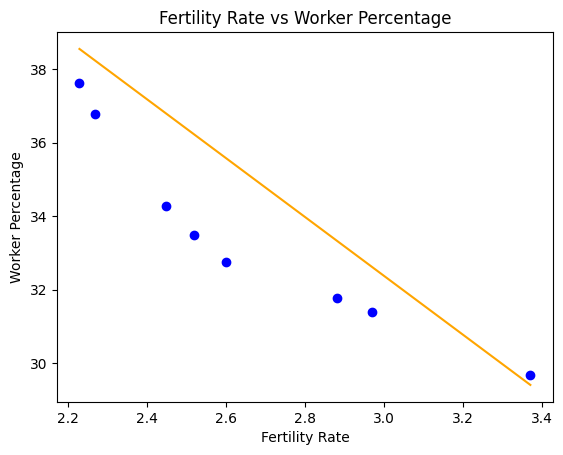

In [137]:
split = 0.66

evaluate_ridge_regression(dataset, split)

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Programming Part 5: Artificial Neural Network

Write a programme that can classify two different type of data points with high accuracy.


### Assessment task:

Write code to develop artificial neural network using the moons dataset. There are 20 steps involved, you will complete the code for steps 2, 3, 4, 5, 9, 10, 11, 12, 13 and 16 only.

### Marks:

This part is of 6 Marks. 

### Instructions:

1. Write your Python code in place of "your code here" placeholder below.
2. Run your code by clicking on 'run' cell in the toolbar before you submit.
3. You will get the feedback once you submit the assignment.

### Submission:

Click on the submit button on the top right after you run the code.

#### Step 1
Import the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from csv import reader

#### Step 2
Load a CSV file

In [ ]:
def load_csv(filename, skip = False):

    dataset = list()
    
    # Opens the file in read only mode
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        
        # Skip the header, if needed
        if skip:
            next(csv_reader, None)
        
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    
    return dataset

#### Step 3
extract only x data

In [ ]:
def extract_only_x_data(dataset):
###
### YOUR CODE HERE
###
    return np.array([[float(row[0]), float(row[1])] for row in dataset])

#### Step 4
extract only y data

In [ ]:
def extract_only_y_data(dataset):
###
### YOUR CODE HERE
###
    return np.array([int(row[2]) for row in dataset])

#### Step 5
Defining the Config that contains the inputs for the network, the outputs for the network as well as the parameters for gradient descent 

In [ ]:
class Config:
    #Specify input layer dimensionality,  output layer dimensionality, learning rate for gradient descent, regularization strength
    
    input_dim = 2  # Number of input features
    output_dim = 2  # Number of classes for the output
    hidden_layer_dim = 3  # Number of nodes in the hidden layer
    learning_rate = 0.01  # Learning rate for gradient descent
    regularization_strength = 0.01  # Regularisation strength



#### Step 6
Load the moons.csv data, extract the data and convert it into num py arrays

In [ ]:
def generate_data():
    filename = 'moons.csv'

    dataset = load_csv(filename)                            # load the data from a csv file

    x_data = extract_only_x_data(dataset)                   # extract the input data (2 inputs)
    y_data = extract_only_y_data(dataset)                   # extract the output data (1 output)
    
    X = np.array(x_data)                                    # convert the data into np array
    y = np.array(y_data)                                    # convert the data into np array

    return X, y                                             # returns both input (X) data and output (y) data

#### Step 7
Assign the X and y with the generated data

In [ ]:
X, y = generate_data()

#### Step 8
Draw the scatter plot

In [ ]:
plt.figure(figsize=(10,7))                              # Defines the size of the plot
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)  # Draws a scatter plot

#### Step 9
Define a activation function of your choice.

In [ ]:
def activation_function(x):
###
### YOUR CODE HERE
###
    # Return the value of the implemented activation function, do not simply return x
    return 1 / (1 + np.exp(-x))

#### Step 10
Define a lost function

In [ ]:
def loss(a):
###
### YOUR CODE HERE
###
    # Return the value of the implemented loss function, do not simply return a
    return -np.log(a)

#### Step 11
Define a weight regularization function

In [ ]:
def weight_regularization(Wx, dWx):
###
### YOUR CODE HERE
###
    # Return the value of the implemented weight regularization function, do not simply return dWx
    return dWx + Config.regularization_strength * Wx

#### Step 12
Define forward propagation function

In [ ]:
def forward_propagation(X, W1, b1, W2, b2):

###
### YOUR CODE HERE
###
    
    # Layer 1 (Hidden layer)
    z1 = np.dot(X, W1) + b1
    a1 = activation_function(z1)
    
    # Layer 2 (Output layer)
    z2 = np.dot(a1, W2) + b2
    
    # Softmax to get probabilities
    exp_scores = np.exp(z2)
    
    return exp_scores

#### Step 13
Define backward propagation function

In [ ]:
def backward_propagation(X, y, W1, b1, W2, b2, exp_scores, number_of_examples):
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
    delta3 = probs
    delta3[range(number_of_examples), y] -= 1

    z2 = np.dot(X, W1) + b1
    a1 = np.tanh(z2)

    dW2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis=0, keepdims=True)

    delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
    
    dW1 = np.dot(X.T, delta2)
    
    # Add regularization terms (b1 and b2 don't have regularization terms)
    db1 = np.sum(delta2, axis=0)
###
### YOUR CODE HERE
###
    # Apply regularization to the gradients for the weights
    dW1 = weight_regularization(W1, dW1)
    dW2 = weight_regularization(W2, dW2)
    
    return dW1, dW2, db1, db2

#### Step 14
Define the loss function, used to evaluate how well the model is doing

In [ ]:
def calculate_loss(model, X, y):
   
    number_of_examples = len(X)
    
    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    
    exp_scores = forward_propagation(X, W1, b1, W2, b2)
    
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # Calculating the loss
    
    correct_probs = loss(probs[range(number_of_examples), y])
    
    data_loss = np.sum(correct_probs)
    
    data_loss = data_loss + Config.regularization_strength / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    
    return 1. / number_of_examples * data_loss

#### Step 15
Make a prediction

In [ ]:
def predict(model, X):
    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    
    exp_scores = forward_propagation(X, W1, b1, W2, b2)
    
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    return np.argmax(probs, axis=1)

#### Step 16
Build the neural network using batch gradient descent using the backpropagation derivates

In [ ]:
def build_model(X, y, number_of_nodes_within_hidden_layer, passes=20000, print_loss=False):

    # Initialize the parameters to random values. We need to learn these
    
    
    number_of_examples = len(X)
    np.random.seed(0)
    
    # Two weights are needed as the network has two inputs
    # Likewise, two biases are needed as the network has two inputs

###
### YOUR CODE HERE
###

    # Initialize weights and biases
    W1 = np.random.randn(Config.input_dim, number_of_nodes_within_hidden_layer) / np.sqrt(Config.input_dim)
    b1 = np.zeros((1, number_of_nodes_within_hidden_layer))
    W2 = np.random.randn(number_of_nodes_within_hidden_layer, Config.output_dim) / np.sqrt(number_of_nodes_within_hidden_layer)
    b2 = np.zeros((1, Config.output_dim))
    
    model = {}
    
    for i in range(0, passes):
        # Forward Propgation
        exp_scores = forward_propagation(X, W1, b1, W2, b2)
        
        # Back Propgation
        dW1, dW2, db1, db2 = backward_propagation(X, y, W1, b1, W2, b2, exp_scores, number_of_examples);
        
        # Gradient descent parameter update

        ###
        ### YOUR CODE HERE
        ###
        W1 += -Config.learning_rate * dW1
        b1 += -Config.learning_rate * db1
        W2 += -Config.learning_rate * dW2
        b2 += -Config.learning_rate * db2
        
        # Assign new parameters to the model
        
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        result = calculate_loss(model, X, y)
        
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" % (i, result))
            
            if result > 2.0:
                print("Loss is too high")
                break
            
    return model


#### Step 17
Train the model

Note: 10,000 passes is used in the auto graders

In [ ]:
model = build_model(X, y, 3, print_loss=True, passes=10000)

#### Step 18
Plot Decision Boundary

In [ ]:
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.title("Artificial Neural Network")
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

#### Step 19
Visualize

In [ ]:
def visualize(X, y, model):
    plot_decision_boundary(lambda x:predict(model, x), X, y)

#### Step 20
Call the visualize function

In [ ]:
try:
    visualize(X, y, model)
except:
    print("Can not visualize the graph, the data or the model is inconsistent")

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
